# Coleta de Dados

### https://www.kaggle.com/datasets/shaz13/real-world-documents-collections

In [12]:
import pandas as pd
import os

In [16]:
from ETL_download_dataset_kaggle import download_dataset, unzip_file
from ETL_process_image import process_dataset

path_dataset = "./dataset/real_world_documents_collections/docs-sm"

def etl_for_dataframe(path_dataset: str) -> pd.DataFrame:
    """
    Gerencia o fluxo de download e descompactação do dataset.
    Extrai textos das imagens
    Prepara textos para serem usado pela ML
    """
    zip_file = 'real-world-documents-collections.zip'
    extract_to = 'dataset/real_world_documents_collections'
    link_dataset = 'shaz13/real-world-documents-collections'
    if not os.path.exists(zip_file):
        # Baixar o dataset
        download_dataset(link_dataset)
        # descompacta arquivo ZIP
        unzip_file(zip_file, extract_to)
    path_df_parquet = './DF_shaz13_real_world_documents_collections.parquet'
    all_folders = ['invoice', 'file_folder', 'memo', 'specification', 'letter', 'scientific_publication', 'scientific_report', 'budget', 'resume', 'handwritten', 'questionnaire', 'form', 'email', 'advertisement', 'presentation', 'news_article']
    required_folders = ['form','resume','letter','invoice', 'questionnaire']
    df = process_dataset(path_dataset, path_df_parquet, required_folders)
    return df

df = etl_for_dataframe(path_dataset)


# Análise Exploratória de Dados (EDA)

In [ ]:
df.shape

In [14]:
df.head(20)

,text,doc_type
0,bellomycarrigginc job university parkway aa ex...,questionnaire
1,inc broadway york screening questionnatre time...,questionnaire
2,,questionnaire
3,alan november account smoking manufacture desc...,questionnaire
4,ob tor old,questionnaire
5,,questionnaire
6,alpha recognition threshold attribute profile ...,questionnaire
7,bmg,questionnaire
8,recruitment questionnaire approach year old me...,questionnaire
9,consumer relation winstonsalem n c frank mayhe...,questionnaire


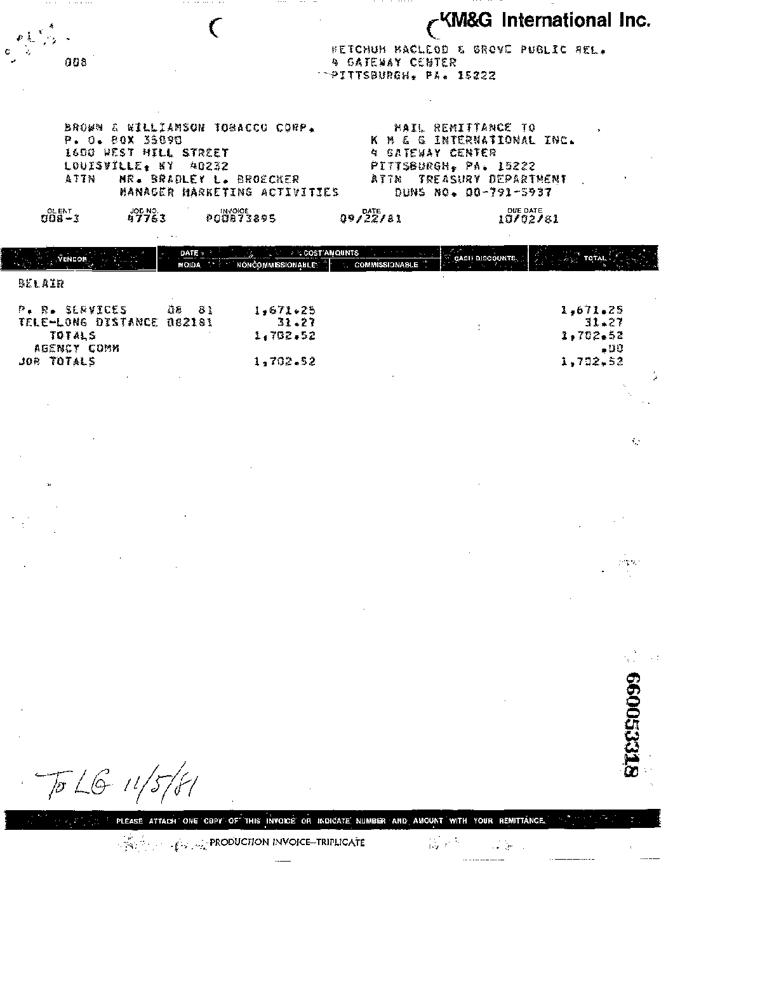

In [19]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(f"{path_dataset}/invoice/0000137486.jpg")
image

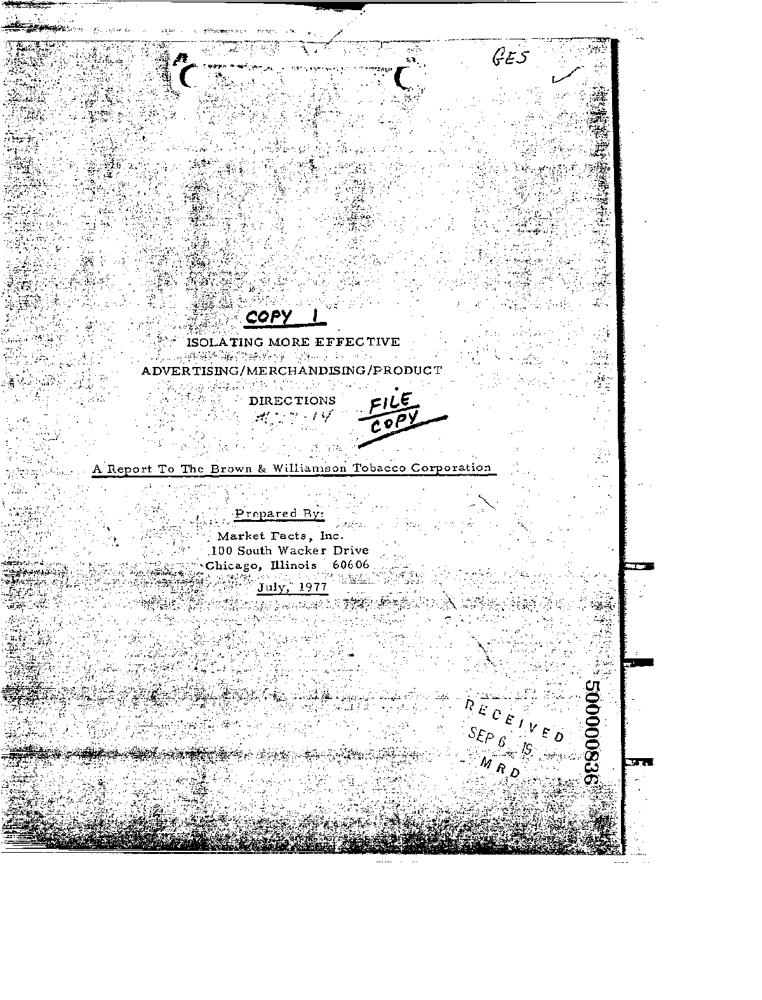

In [20]:

image = Image.open(f"{path_dataset}/questionnaire/0000002206.jpg")
image

# Separando os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

### Vetorizando dos dados

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Configurando o TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2,5), max_df=0.95, min_df=2 ,max_features=10000)

In [ ]:
# Ajustando e transformando os dados de treinamento
tfidf_train = tfidf.fit_transform(X_train)
# Convertendo a matriz esparsa em uma matriz densa
tfidf_test = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Lista de modelos para comparar
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Ajuste de hiperparâmetros usando GridSearchCV

busca pela configuração ideal de parâmetros para cada modelo.

Definição de param_grids: Para cada modelo, definimos um dicionário de param_grid que contém os parâmetros que desejamos ajustar utilizando GridSearchCV. Os parâmetros específicos foram escolhidos com base na prática comum e podem ser ajustados conforme necessário.

Loop de Ajuste de Parâmetros: Iteramos sobre o dicionário models, que contém os modelos a serem testados. Para cada modelo, realizamos o ajuste de hiperparâmetros usando GridSearchCV.

GridSearchCV: Criamos um objeto GridSearchCV para cada modelo, onde especificamos o modelo, o param_grid correspondente, o número de folds para validação cruzada (cv=5 neste exemplo) e a métrica de avaliação (scoring='accuracy').

Execução da Busca em Grade: Chamamos o método fit() para executar a busca em grade no conjunto de treinamento (tfidf_train, y_train).

Armazenamento do Melhor Modelo: Após a busca em grade, armazenamos o melhor modelo encontrado (best_estimator_) no dicionário best_models.

Avaliação no Conjunto de Teste: Finalmente, avaliamos os melhores modelos encontrados no conjunto de teste (tfidf_test, y_test) e exibimos a acurácia para cada modelo.

In [ ]:
# baseado nos melhores parâmetros encontrados
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2]
}

param_grid_svc = {
    'C': [1.0],
    'kernel': ['linear'],
    'gamma': ['scale']
}

param_grid_nb = {
    'alpha': [0.1],
    'fit_prior': [True]
}

param_grid_knn = {
    'n_neighbors': [10],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

param_grid_gb = {
    'n_estimators': [200],
    'learning_rate': [0.5],
    'max_depth': [10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os primeiros parâmetros para começar a testar em cada modelo
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_svc = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_depth': [3, 5, 10]
}

# Dicionário de param_grids para cada modelo
param_grids = {
    'Logistic Regression': param_grid_lr,
    'Random Forest': param_grid_rf,
    'SVM': param_grid_svc,
    'Naive Bayes': param_grid_nb,
    'KNN': param_grid_knn,
    'Gradient Boosting': param_grid_gb
}

# Lista para armazenar os melhores modelos ajustados
best_models = {}

# Executar GridSearchCV para cada modelo
for name, model in models.items():
    print(f"Ajustando hiperparâmetros para {name} ...")
    # Definir o param_grid específico para o modelo atual
    param_grid: dict = param_grids[name]
    # Criar o objeto GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    # Executar a busca em grade no conjunto de treinamento
    grid_search.fit(tfidf_train, y_train)    
    # Armazenar o melhor modelo ajustado
    best_models[name] = grid_search.best_estimator_
    # Mostrar os melhores parâmetros encontrados
    print(f"Melhores parâmetros encontrados para {name}:")
    print(grid_search.best_params_)
    print()

# Avaliar os melhores modelos no conjunto de teste e mostrar métricas
print("\nAvaliação dos melhores modelos no conjunto de teste:")

for name, model in best_models.items():
    # Avaliar o modelo no conjunto de teste
    accuracy = model.score(tfidf_test, y_test)
    print(f'{name}: Acurácia no teste = {accuracy:.4f}')


Ajustando hiperparâmetros para Logistic Regression ...


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Melhores parâmetros encontrados para Logistic Regression:
{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

Ajustando hiperparâmetros para Random Forest ...
Melhores parâmetros encontrados para Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

Ajustando hiperparâmetros para SVM ...
Melhores parâmetros encontrados para SVM:
{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

Ajustando hiperparâmetros para Naive Bayes ...
Melhores parâmetros encontrados para Naive Bayes:
{'alpha': 0.1, 'fit_prior': True}

Ajustando hiperparâmetros para KNN ...
Melhores parâmetros encontrados para KNN:
{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

Ajustando hiperparâmetros para Gradient Boosting ...
Melhores parâmetros encontrados para Gradient Boosting:
{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}


Avaliação dos melhores modelos no conjunto de teste:
Logistic Regression: Acurácia no teste = 0.8182
Random Forest: Acurácia no teste = 0.969